In [1]:
! pip install mglearn
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 7.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=defa084cd92f73e5199339650b73695ac222f5c146b7fee206d2ff80cabf1043
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


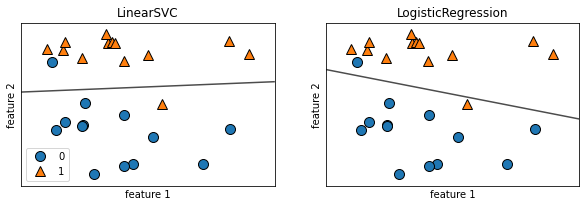

In [2]:
# 로지스틱 회귀, SVM library 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# dataset 로드
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
  clf = model.fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, 
                                  eps=0.5, ax=ax, alpha=.7)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(clf.__class__.__name__)
  ax.set_xlabel("feature 1")
  ax.set_ylabel("feature 2")
axes[0].legend()

In [4]:
# Decison Tree Classifier 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
#훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
#학습
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)
#결과
print("train set: {:.3f}".format(tree.score(X_train, y_train)))
print("test set: {:.3f}".format(tree.score(X_test, y_test)))

train set: 0.988
test set: 0.951


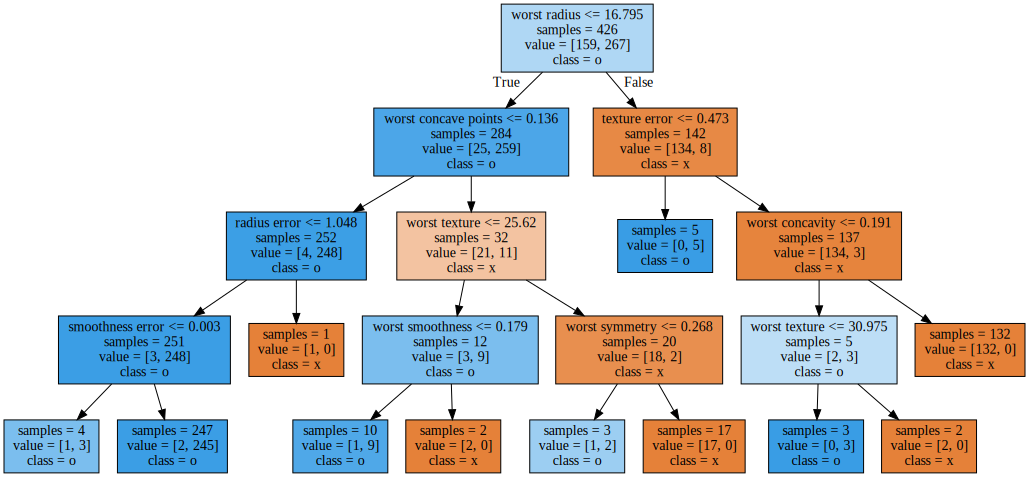

In [10]:
# 트리 모듈의 exprot_graphvis 함수를 이용해 트리 시각화 가능
# filled 매개변수를 true 지정하면 노드의 클래스가 구분되도록 색칠
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = "tree.dot",class_names = ["x","o"],
                feature_names = cancer.feature_names, impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [11]:
#특성 중요도 확인
print("feature importance: \n",tree.feature_importances_)

feature importance: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


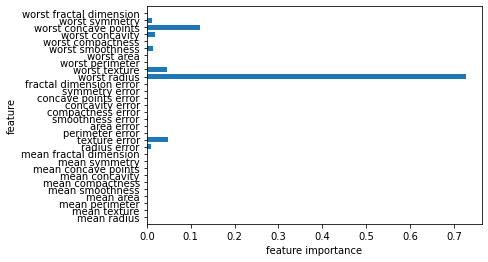

In [23]:
# 특성 중요로 활성화
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(np.arange(n_features), model.feature_importances_,align = 'center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("feature importance")
  plt.ylabel("feature")
  plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

Text(0, 0.5, 'price ($/Mbyte)')

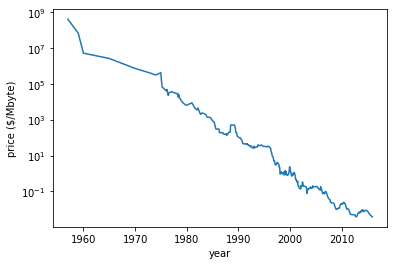

In [24]:
import os
ram_price = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
# y축 로그스케일로 출력
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")